# Plot TROPoe cross sections

This script is going to read a TROPoe file and plot time/height crosss sections.

We'll begin by loading the data using the previously constructed read_tropoe function. This creates an **aeri** class that is similar to the Matlab structures that you're already familiar with. You'll then need to meshgrid the output of that so that we can have a plottable time and height.

In [1]:
from read_tropoe import read_tropoe
import numpy as np
import matplotlib.pyplot as plt

f='/data/eclipse/sparceclipsetropoe.c1.20240408.153334.old.nc'

aeri = read_tropoe(f)

timeGrid, heightGrid = np.meshgrid(aeri.time, aeri.height)


Here, we're going to make the figure.

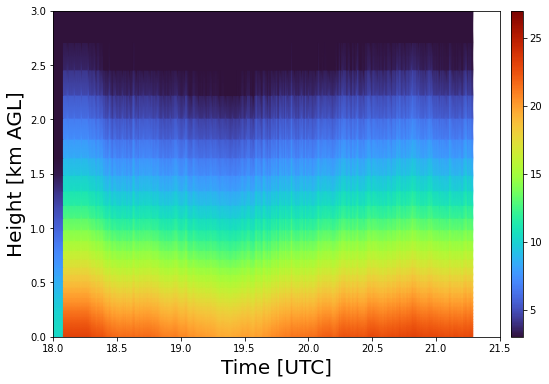

In [9]:
temp = np.transpose(aeri.temp)

fig = plt.figure(figsize=(8,6))
axes = plt.axes()
f1=axes.pcolormesh(timeGrid, heightGrid, temp,edgecolor='none',
    shading='gouraud',vmin=3, vmax=27,cmap='turbo')
box = axes.get_position()
cax = fig.add_axes([box.xmax + 0.02, box.ymin, 0.02, box.height])
cb = fig.colorbar(f1, cax=cax)

axes.set_ylim(0,3)
axes.set_xlim(18,21.5)
axes.set_ylabel('Height [km AGL]', fontsize=20)
axes.set_xlabel('Time [UTC]', fontsize=20)

plt.show()